In [7]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
print(os.listdir("DATASET/"))

['.DS_Store', 'TEST', 'TRAIN', '.ipynb_checkpoints']


In [8]:
print(os.listdir("DATASET/TRAIN/"))

['.DS_Store', 'R', 'O']


In [9]:
TRAIN_DIR = "DATASET/TRAIN/"
TEST_DIR =  "DATASET/TEST/"

In [10]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['R']:
                label = 0
            elif nextdir in ['O']:
                label = 1
            else:
                label = 2
    return nextdir, label


In [11]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y


In [12]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['R']:
                label = 0
            elif nextDir in ['O']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(299, 299, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y


In [13]:
X_train, y_train = get_data(TRAIN_DIR)

100%|██████████| 12566/12566 [01:42<00:00, 122.01it/s]


In [14]:
X_test , y_test = get_data(TEST_DIR)

100%|██████████| 1401/1401 [00:08<00:00, 160.41it/s]


In [15]:
print(X_train.shape,'\n',X_test.shape)

(22564, 150, 150, 3) 
 (2513, 150, 150, 3)


In [16]:
print(y_train.shape,'\n',y_test.shape)

(22564,) 
 (2513,)


In [17]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

Using TensorFlow backend.
/Users/nishit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nishit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nishit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/nishit/opt/anaconda3/lib/python3.7

In [18]:
print(y_train.shape,'\n',y_test.shape)

(22564, 2) 
 (2513, 2)


In [19]:
Pimages = os.listdir(TRAIN_DIR + "O")
Nimages = os.listdir(TRAIN_DIR + "R")

(Left) - Recyclable Vs (Right) - Organic
-----------------------------------------------------------------------------------------------------------------------------------


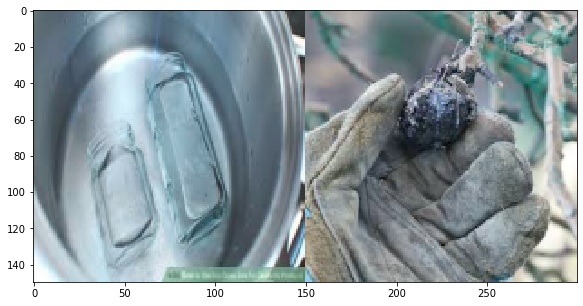

(Left) - Recyclable Vs (Right) - Organic
-----------------------------------------------------------------------------------------------------------------------------------


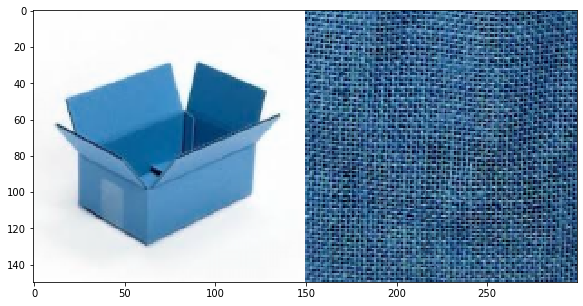

(Left) - Recyclable Vs (Right) - Organic
-----------------------------------------------------------------------------------------------------------------------------------


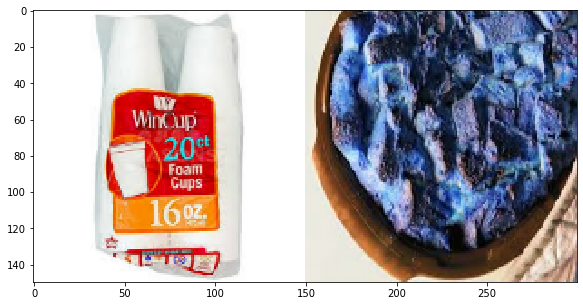

(Left) - Recyclable Vs (Right) - Organic
-----------------------------------------------------------------------------------------------------------------------------------


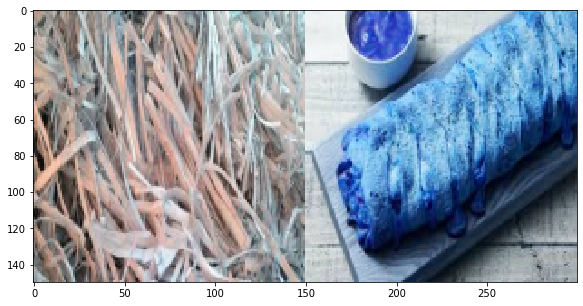

(Left) - Recyclable Vs (Right) - Organic
-----------------------------------------------------------------------------------------------------------------------------------


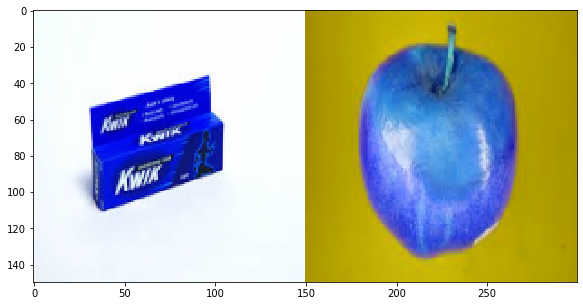

In [20]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"O/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"R/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - Recyclable Vs (Right) - Organic")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

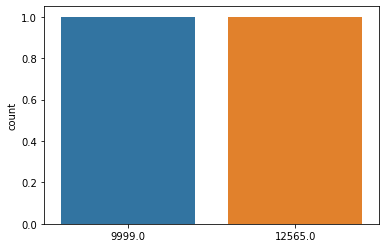

In [21]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)

In [22]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/Users/nishit/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [23]:
filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# Model 3: Inception Resnet V2 model
This is a heavily engineered model which process the data with multiple filters in the same level. This model contained 203 convolutional blocks to process the dataset. This model has one fully connected layer with 258 units, i.e. it contains 258 hidden layers which was activated by the Sigmoid activation Function. This model was compiled with RMSprop optimizer with Categorical Cross Entropy loss function.

In [24]:
from keras.models import Sequential , Model
from keras.layers import Dense , Activation
from keras.layers import Dropout , GlobalAveragePooling2D
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop , Adadelta , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_first')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [25]:
X_train=X_train.reshape(22564,3,150,150)
X_test=X_test.reshape(2513,3,150,150)

In [26]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
# create the base pre-trained model
base_model = InceptionResNetV2(weights=None, include_top=False , input_shape=(3, 150, 150))

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
x = base_model.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(2, activation='sigmoid')(x)

In [28]:
base_model.load_weights("inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [29]:
model = Model(inputs=base_model.input, outputs=predictions)

In [30]:
model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [31]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 150, 150)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 74, 74)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 74, 74)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 74, 74)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [32]:
batch_size = 64
epochs = 10

In [33]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Train on 22564 samples, validate on 2513 samples
Epoch 1/10
22564/22564 [==============================] - 8698s 386ms/step - loss: 0.3997 - accuracy: 0.8291 - val_loss: 0.2842 - val_accuracy: 0.8993


/Users/nishit/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/Users/nishit/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 2/10
22564/22564 [==============================] - 10220s 453ms/step - loss: 0.3509 - accuracy: 0.8527 - val_loss: 0.3831 - val_accuracy: 0.8571
Epoch 3/10
22564/22564 [==============================] - 20805s 922ms/step - loss: 0.3337 - accuracy: 0.8599 - val_loss: 0.3596 - val_accuracy: 0.8691
Epoch 4/10
22564/22564 [==============================] - 7968s 353ms/step - loss: 0.3205 - accuracy: 0.8674 - val_loss: 0.3272 - val_accuracy: 0.8707
Epoch 5/10
22564/22564 [==============================] - 9442s 418ms/step - loss: 0.3213 - accuracy: 0.8686 - val_loss: 0.4366 - val_accuracy: 0.8046
Epoch 6/10
22564/22564 [==============================] - 7529s 334ms/step - loss: 0.3548 - accuracy: 0.8460 - val_loss: 0.2605 - val_accuracy: 0.8910
Epoch 7/10
22564/22564 [==============================] - 7835s 347ms/step - loss: 0.3342 - accuracy: 0.8526 - val_loss: 0.6821 - val_accuracy: 0.4620
Epoch 8/10
22564/22564 [==============================] - 9580s 425ms/step - loss: 0.4064 - 

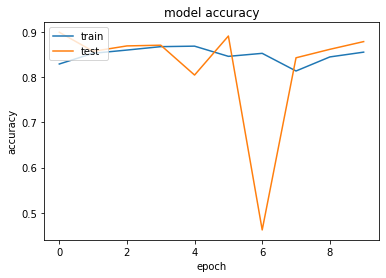

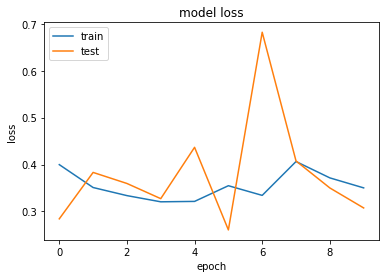

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Here the accuracy achieved is 88%, but we cannot completely define the efficiency of Model on accuracy, so other factors also taken into consideration like Precision and Recall

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

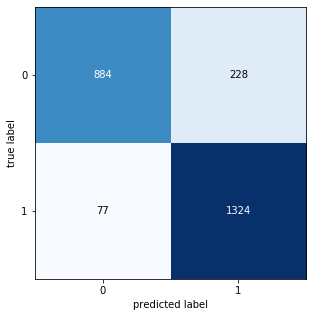

In [43]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Here , recall is most significant quantity even more than accuracy and precision.

# Since we are having unequal number of images in both the classes , therefore we can't take accuracy as an alone metric to calculate model efficieny .

# precision = True Positive / (True Positive + False Positive)
# recall = True Positive / (True Positive + False Negative)

# Also precision can't be taken as alone metric and has less significance than recall in this particular dataset because we have to minimize false negative and that is in the denominator and thus finally increasing 'Recall' .


In [41]:
print (classification_report(y_true,pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1112
           1       0.85      0.95      0.90      1401

    accuracy                           0.88      2513
   macro avg       0.89      0.87      0.87      2513
weighted avg       0.88      0.88      0.88      2513



In [42]:
model.save('Waste_identifier.h5')